In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime

In [28]:
df = pd.read_csv('/Users/leatinelli/Desktop/hec/Time series/paris-air-quality-prediction/data/train.csv')

In [29]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6
...,...,...,...,...,...,...
40986,2024-09-03 18,NaN,0.222,55.1,12.0,5.3
40987,2024-09-03 19,NaN,0.245,48.2,13.4,7.0
40988,2024-09-03 20,NaN,0.234,44.5,12.4,7.1
40989,2024-09-03 21,NaN,0.225,25.9,10.6,5.4


In [30]:
df['id'].astype(str).str.extract(r'\s(\d{2})')[0].unique()


array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [31]:
df['date'] = df['id'].str.extract(r'^(\d{4}-\d{2}-\d{2})')[0]

In [32]:
df['hour'] = df['id'].str.extract(r'\s(\d{2})')[0]

In [33]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,hour
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01,00
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01,01
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01,02
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01,03
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01,04
...,...,...,...,...,...,...,...,...
40986,2024-09-03 18,NaN,0.222,55.1,12.0,5.3,2024-09-03,18
40987,2024-09-03 19,NaN,0.245,48.2,13.4,7.0,2024-09-03,19
40988,2024-09-03 20,NaN,0.234,44.5,12.4,7.1,2024-09-03,20
40989,2024-09-03 21,NaN,0.225,25.9,10.6,5.4,2024-09-03,21


In [34]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['hour'] = df['hour'].astype(int)

In [35]:
df.isna().sum()

id                 0
valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
date               0
hour               0
dtype: int64

In [36]:
df.isna().mean().round(3)


id             0.000
valeur_NO2     0.080
valeur_CO      0.306
valeur_O3      0.017
valeur_PM10    0.175
valeur_PM25    0.044
date           0.000
hour           0.000
dtype: float64

In [37]:
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')
df = df.set_index('datetime').asfreq('H')

/var/folders/tv/xjldkmgs0n1bjwmmm79pqvs00000gn/T/ipykernel_8630/3878545405.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index('datetime').asfreq('H')


In [38]:
#for col in ['valeur_NO2', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']:
   # df[col] = (
    #    df.groupby(df.index.hour)[col]
     #   .transform(lambda x: x.fillna(x.mean()))
      #  .interpolate(method='time')
    #)

In [39]:
#df['valeur_CO'] = (
 #   df['valeur_CO']
  #  .interpolate(method='time', limit_direction='both')
   # .fillna(df.groupby(df.index.hour)['valeur_CO'].transform('mean'))
#)

In [40]:
df.isna().sum()

id                 0
valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
date               0
hour               0
dtype: int64

In [41]:
df['dayofweek'] = df.index.dayofweek

In [42]:
df['dayofweek_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)

In [43]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,hour,dayofweek,dayofweek_sin,dayofweek_cos
datetime,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01,0,2,0.974928,-0.222521
2020-01-01 01:00:00,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01,1,2,0.974928,-0.222521
2020-01-01 02:00:00,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01,2,2,0.974928,-0.222521
2020-01-01 03:00:00,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01,3,2,0.974928,-0.222521
2020-01-01 04:00:00,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01,4,2,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 18:00:00,2024-09-03 18,NaN,0.222,55.1,12.0,5.3,2024-09-03,18,1,0.781831,0.623490
2024-09-03 19:00:00,2024-09-03 19,NaN,0.245,48.2,13.4,7.0,2024-09-03,19,1,0.781831,0.623490
2024-09-03 20:00:00,2024-09-03 20,NaN,0.234,44.5,12.4,7.1,2024-09-03,20,1,0.781831,0.623490


In [44]:
daily_means = df.groupby('date')[['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']].transform('mean')

In [45]:
daily_means = daily_means.add_suffix('_mean_24h')

In [46]:
df = pd.concat([df, daily_means], axis=1)

In [47]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,hour,dayofweek,dayofweek_sin,dayofweek_cos,valeur_NO2_mean_24h,valeur_CO_mean_24h,valeur_O3_mean_24h,valeur_PM10_mean_24h,valeur_PM25_mean_24h
datetime,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01,0,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000
2020-01-01 01:00:00,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01,1,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000
2020-01-01 02:00:00,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01,2,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000
2020-01-01 03:00:00,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01,3,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000
2020-01-01 04:00:00,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01,4,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 18:00:00,2024-09-03 18,NaN,0.222,55.1,12.0,5.3,2024-09-03,18,1,0.781831,0.623490,NaN,0.182304,44.352174,9.969565,4.821739
2024-09-03 19:00:00,2024-09-03 19,NaN,0.245,48.2,13.4,7.0,2024-09-03,19,1,0.781831,0.623490,NaN,0.182304,44.352174,9.969565,4.821739
2024-09-03 20:00:00,2024-09-03 20,NaN,0.234,44.5,12.4,7.1,2024-09-03,20,1,0.781831,0.623490,NaN,0.182304,44.352174,9.969565,4.821739


In [49]:
d = pd.to_datetime(df['date'])

lockdown = (
    ((d >= pd.Timestamp('2020-03-17')) & (d <= pd.Timestamp('2020-05-10'))) |  # 1er confinement
    ((d >= pd.Timestamp('2020-10-30')) & (d <= pd.Timestamp('2020-12-14'))) |  # 2e confinement
    ((d >= pd.Timestamp('2021-04-03')) & (d <= pd.Timestamp('2021-05-02')))    # 3e confinement
)
df['is_lockdown_paris'] = lockdown.astype(int)

In [50]:
h = df['hour']

def in_curfew_vec(d, h, start_date, end_date, start_hour, end_hour):
    day_in = (d >= pd.Timestamp(start_date)) & (d <= pd.Timestamp(end_date))
    if start_hour < end_hour:
        # fenêtre sans passage minuit (ex: 18:00–06:00 n'existe pas ici)
        hour_in = (h >= start_hour) & (h < end_hour)
    else:
        # fenêtre avec passage minuit (ex: 21:00–06:00, 23:00–06:00)
        hour_in = (h >= start_hour) | (h < end_hour)
    return day_in & hour_in

curfew = np.zeros(len(df), dtype=bool)

# Île-de-France et grandes métropoles : 17–29 oct 2020, 21:00–06:00
curfew |= in_curfew_vec(d, h, '2020-10-17', '2020-10-29', 21, 6)

# National : 15 déc 2020 – 15 jan 2021, 20:00–06:00
curfew |= in_curfew_vec(d, h, '2020-12-15', '2021-01-15', 20, 6)

# Avancé à 18:00 : 16 jan – 18 mai 2021, 18:00–06:00
curfew |= in_curfew_vec(d, h, '2021-01-16', '2021-05-18', 18, 6)

# Décalé à 21:00 : 19 mai – 8 juin 2021, 21:00–06:00
curfew |= in_curfew_vec(d, h, '2021-05-19', '2021-06-08', 21, 6)

# Décalé à 23:00 : 9 – 20 juin 2021 (levé le 20/06 au matin), 23:00–06:00
curfew |= in_curfew_vec(d, h, '2021-06-09', '2021-06-20', 23, 6)

# Exception : pas de couvre-feu la nuit du 24 décembre 2020
exc = (
    ((d == pd.Timestamp('2020-12-24')) & (h >= 20)) |
    ((d == pd.Timestamp('2020-12-25')) & (h < 6))
)
curfew = curfew & ~exc

df['is_curfew_paris'] = curfew.astype(int)

In [51]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,hour,dayofweek,dayofweek_sin,dayofweek_cos,valeur_NO2_mean_24h,valeur_CO_mean_24h,valeur_O3_mean_24h,valeur_PM10_mean_24h,valeur_PM25_mean_24h,is_lockdown_paris,is_curfew_paris
datetime,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01,0,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000,0,0
2020-01-01 01:00:00,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01,1,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000,0,0
2020-01-01 02:00:00,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01,2,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000,0,0
2020-01-01 03:00:00,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01,3,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000,0,0
2020-01-01 04:00:00,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01,4,2,0.974928,-0.222521,28.170833,0.328957,6.179167,28.133333,24.800000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 18:00:00,2024-09-03 18,NaN,0.222,55.1,12.0,5.3,2024-09-03,18,1,0.781831,0.623490,NaN,0.182304,44.352174,9.969565,4.821739,0,0
2024-09-03 19:00:00,2024-09-03 19,NaN,0.245,48.2,13.4,7.0,2024-09-03,19,1,0.781831,0.623490,NaN,0.182304,44.352174,9.969565,4.821739,0,0
2024-09-03 20:00:00,2024-09-03 20,NaN,0.234,44.5,12.4,7.1,2024-09-03,20,1,0.781831,0.623490,NaN,0.182304,44.352174,9.969565,4.821739,0,0


<Figure size 1000x400 with 0 Axes>

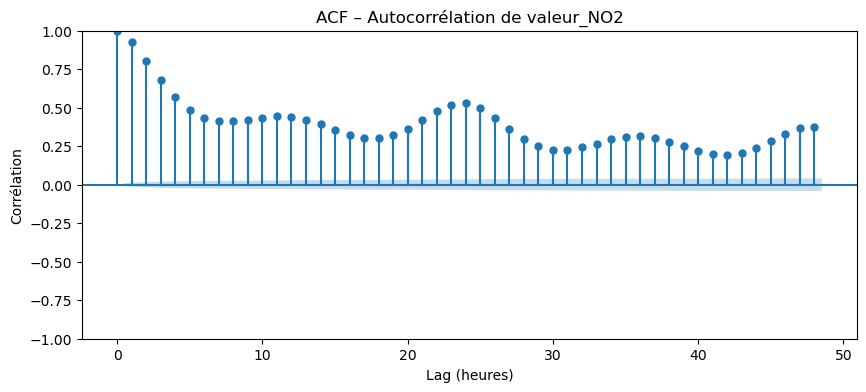

<Figure size 1000x400 with 0 Axes>

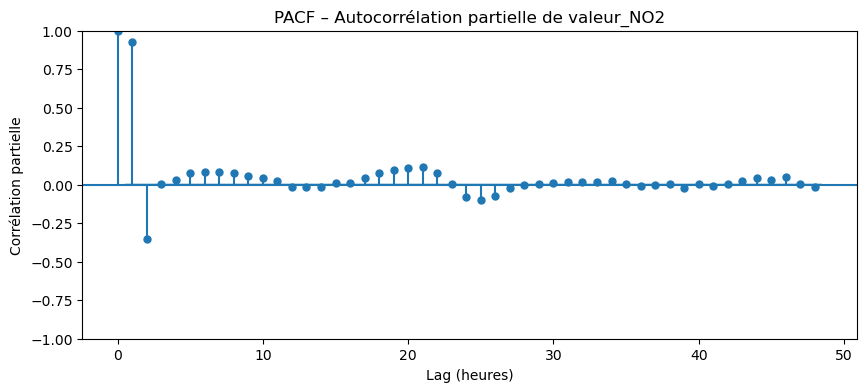

<Figure size 1000x400 with 0 Axes>

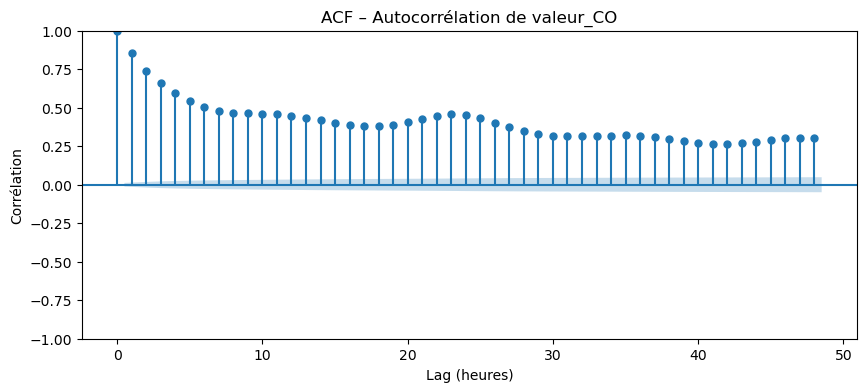

<Figure size 1000x400 with 0 Axes>

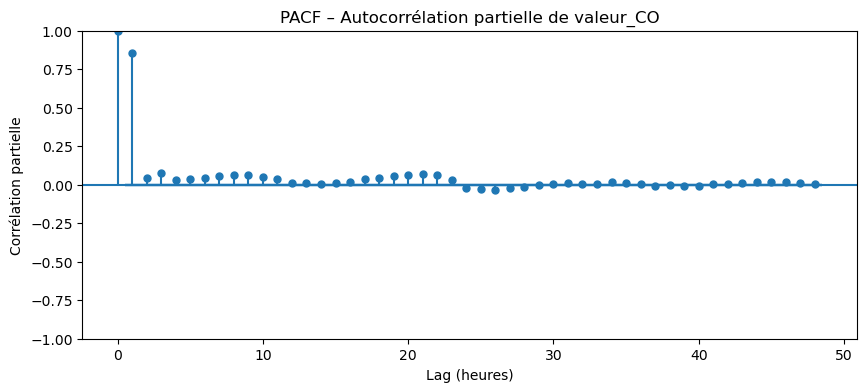

<Figure size 1000x400 with 0 Axes>

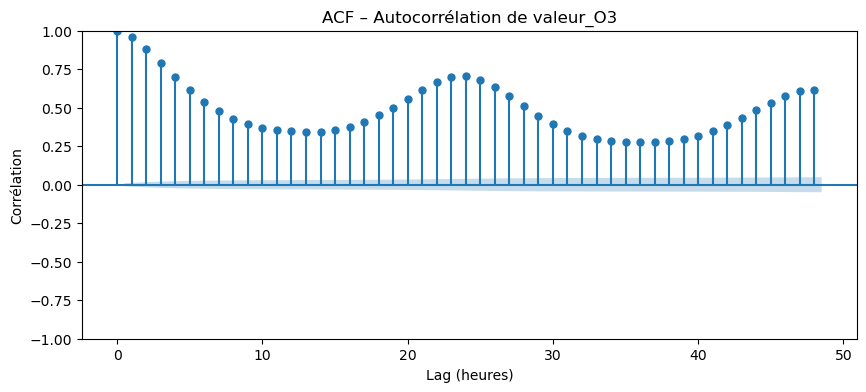

<Figure size 1000x400 with 0 Axes>

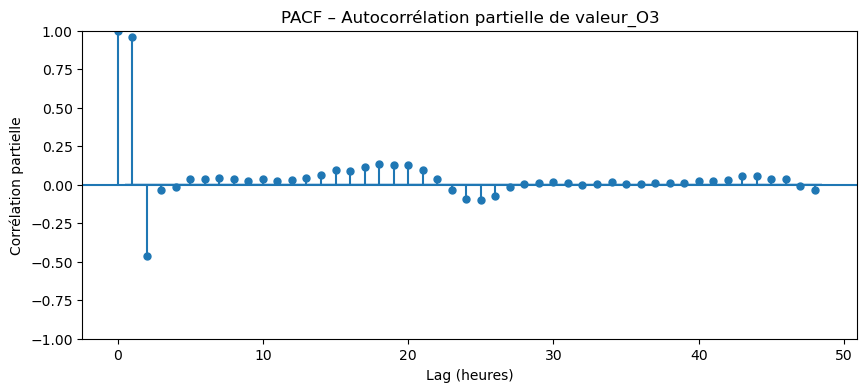

<Figure size 1000x400 with 0 Axes>

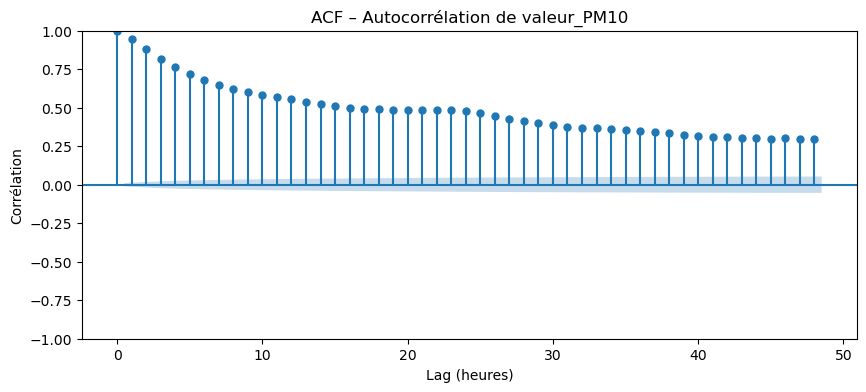

<Figure size 1000x400 with 0 Axes>

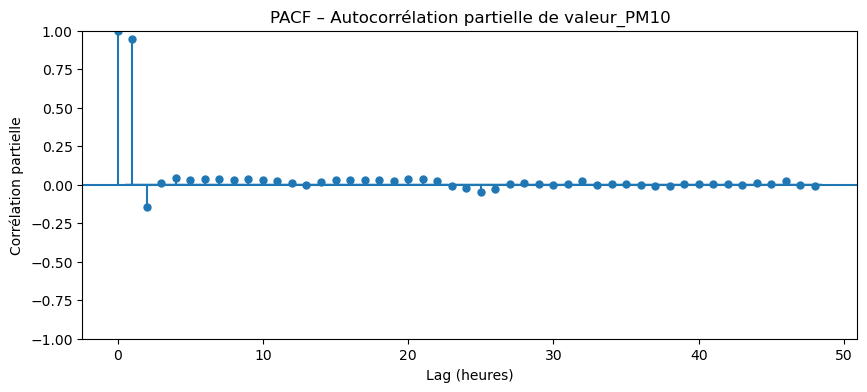

<Figure size 1000x400 with 0 Axes>

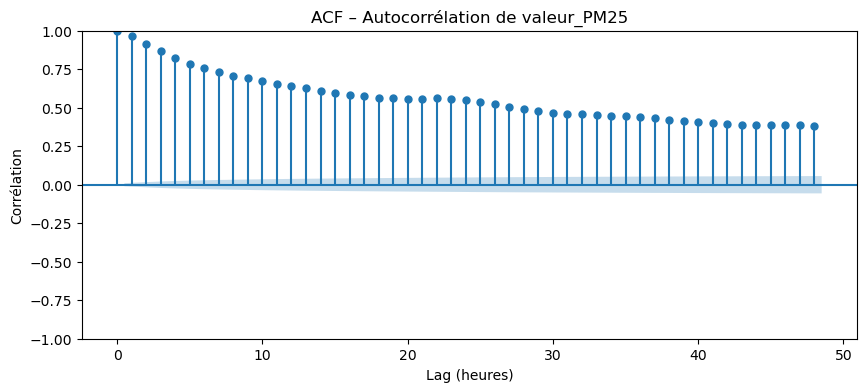

<Figure size 1000x400 with 0 Axes>

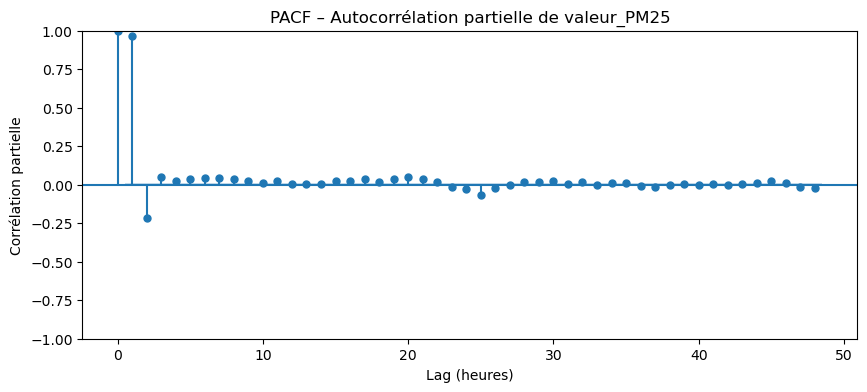

In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cols = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# taille du graphe
plt.rcParams['figure.figsize'] = (10, 4)

for col in cols:
    series = df[col].dropna()

    # --- ACF ---
    plt.figure()
    plot_acf(series, lags=48)
    plt.title(f"ACF – Autocorrélation de {col}")
    plt.xlabel("Lag (heures)")
    plt.ylabel("Corrélation")
    plt.show()

    # --- PACF ---
    plt.figure()
    plot_pacf(series, lags=48, method='ywm')
    plt.title(f"PACF – Autocorrélation partielle de {col}")
    plt.xlabel("Lag (heures)")
    plt.ylabel("Corrélation partielle")
    plt.show()


In [54]:
cols = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Création des lags à 1h et 2h
for col in cols:
    for lag in [1, 2]:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

In [55]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,hour,dayofweek,dayofweek_sin,...,valeur_NO2_lag1,valeur_NO2_lag2,valeur_CO_lag1,valeur_CO_lag2,valeur_O3_lag1,valeur_O3_lag2,valeur_PM10_lag1,valeur_PM10_lag2,valeur_PM25_lag1,valeur_PM25_lag2
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01,0,2,0.974928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01,1,2,0.974928,...,42.9,NaN,0.718,NaN,15.7,NaN,73.1,NaN,64.4,NaN
2020-01-01 02:00:00,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01,2,2,0.974928,...,33.6,42.9,0.587,0.718,10.1,15.7,74.8,73.1,66.0,64.4
2020-01-01 03:00:00,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01,3,2,0.974928,...,29.3,33.6,NaN,0.587,5.1,10.1,51.0,74.8,44.9,66.0
2020-01-01 04:00:00,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01,4,2,0.974928,...,30.5,29.3,0.246,NaN,7.2,5.1,27.7,51.0,25.1,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 18:00:00,2024-09-03 18,NaN,0.222,55.1,12.0,5.3,2024-09-03,18,1,0.781831,...,NaN,NaN,0.205,0.182,60.3,64.8,14.0,9.6,4.5,3.5
2024-09-03 19:00:00,2024-09-03 19,NaN,0.245,48.2,13.4,7.0,2024-09-03,19,1,0.781831,...,NaN,NaN,0.222,0.205,55.1,60.3,12.0,14.0,5.3,4.5
2024-09-03 20:00:00,2024-09-03 20,NaN,0.234,44.5,12.4,7.1,2024-09-03,20,1,0.781831,...,NaN,NaN,0.245,0.222,48.2,55.1,13.4,12.0,7.0,5.3
